









# Problem Statement: Create a Machine Learning model using various Classification Models to predict rainfall.



# Load the Data 

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('sydney_rain prediction.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


# Explore the dataset to understand its structure

In [4]:
df.shape

(3337, 17)

In [5]:
df.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


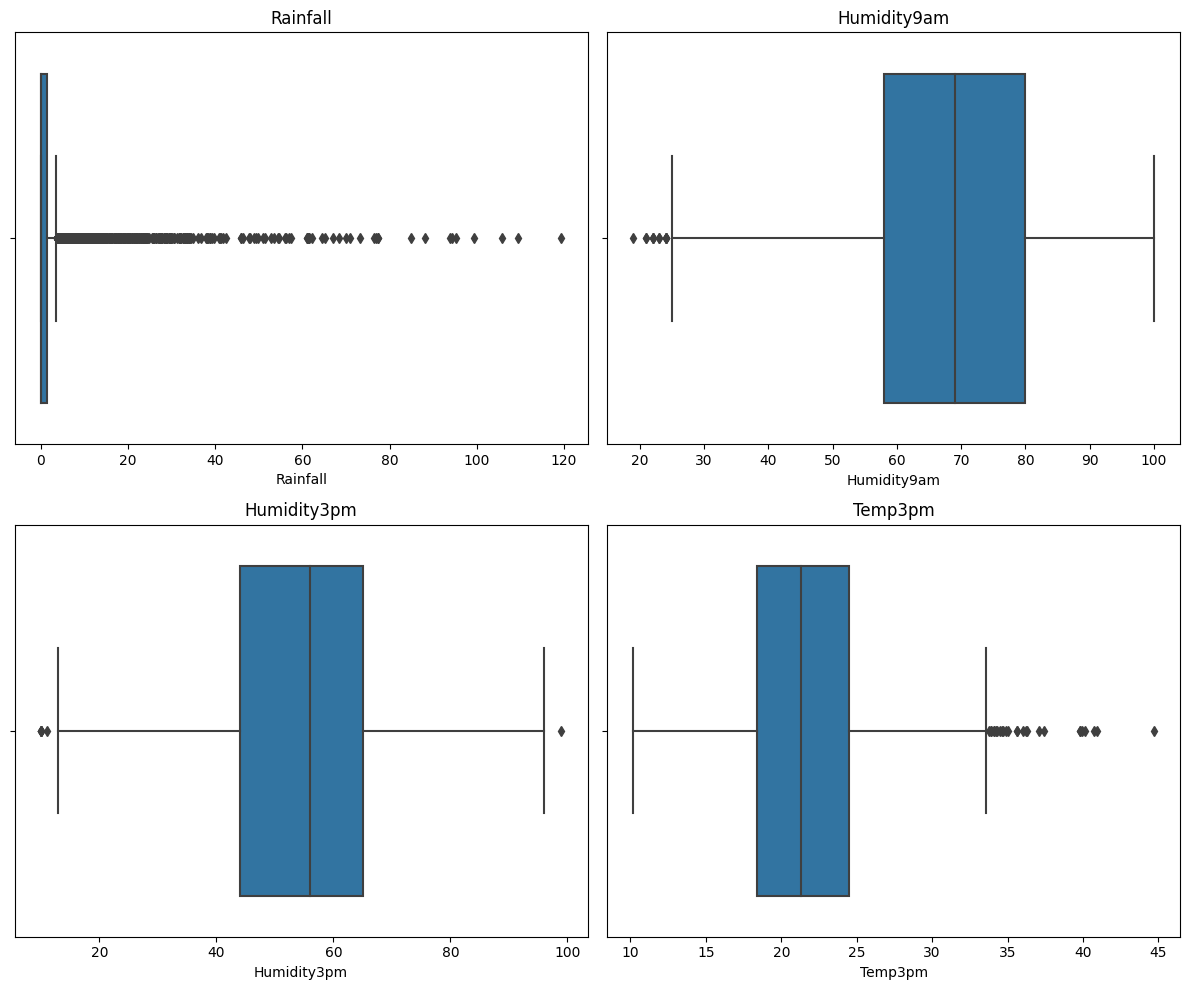

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.boxplot(x='Rainfall', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Rainfall')

sns.boxplot(x='Humidity9am', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Humidity9am')

sns.boxplot(x='Humidity3pm', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Humidity3pm')

sns.boxplot(x='Temp3pm', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Temp3pm')

plt.tight_layout()

plt.show()


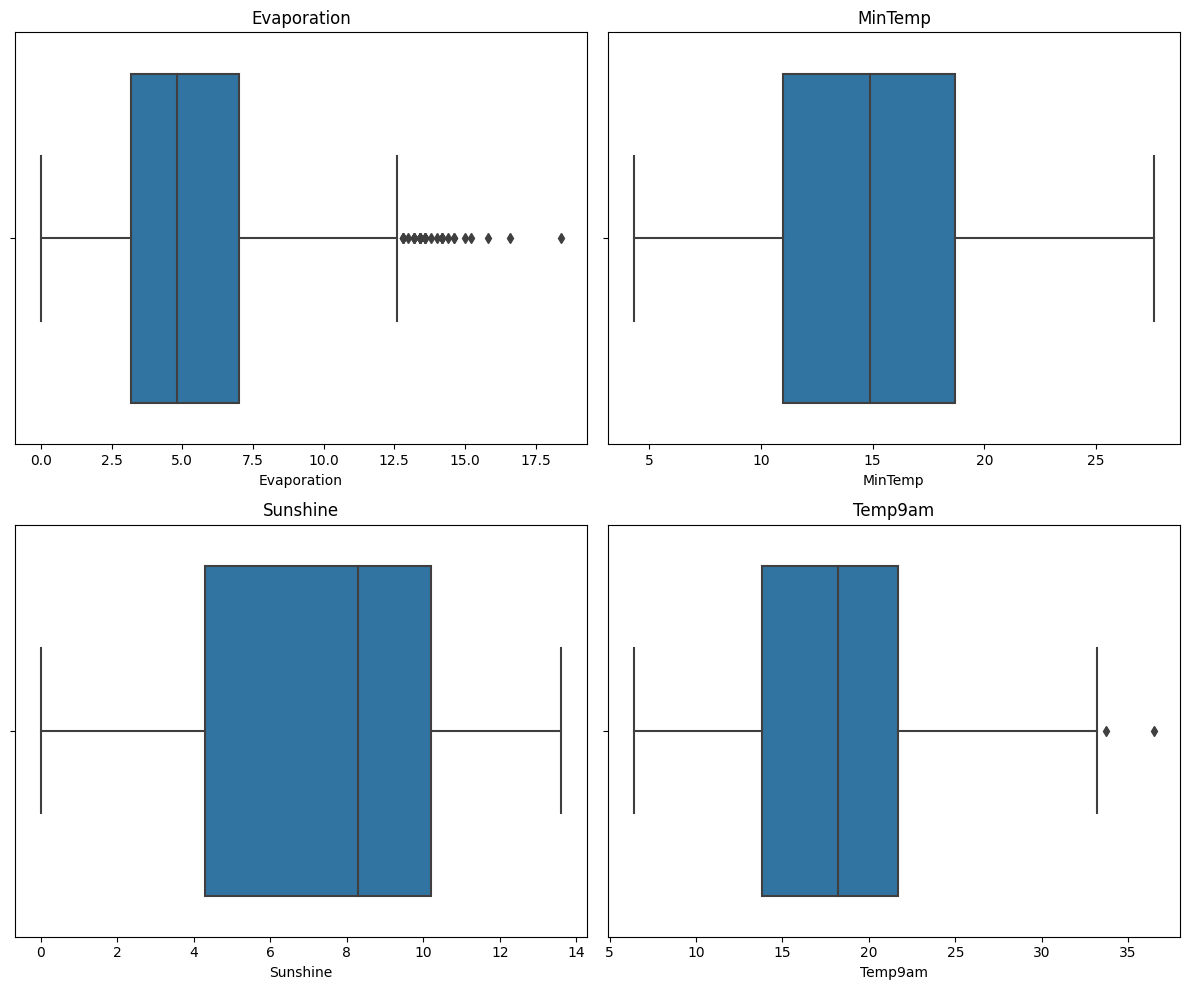

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.boxplot(x='Evaporation', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Evaporation')

sns.boxplot(x='MinTemp', data=df, ax=axes[0, 1])
axes[0, 1].set_title('MinTemp')

sns.boxplot(x='Sunshine', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Sunshine')

sns.boxplot(x='Temp9am', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Temp9am')

plt.tight_layout()

plt.show()

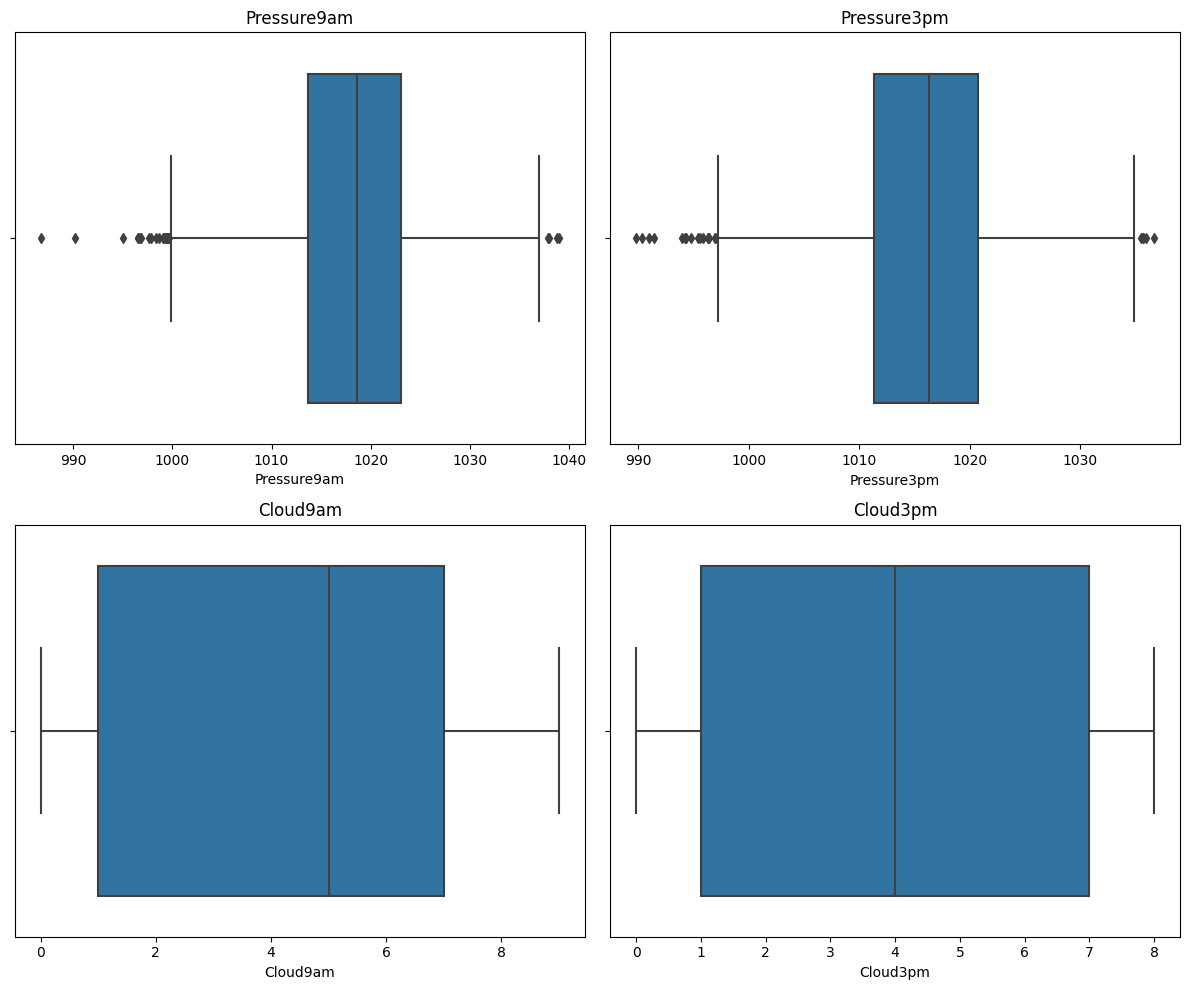

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.boxplot(x='Pressure9am', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Pressure9am')

sns.boxplot(x='Pressure3pm', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Pressure3pm')

sns.boxplot(x='Cloud9am', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Cloud9am')

sns.boxplot(x='Cloud3pm', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Cloud3pm')

plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'RainTomorrow')

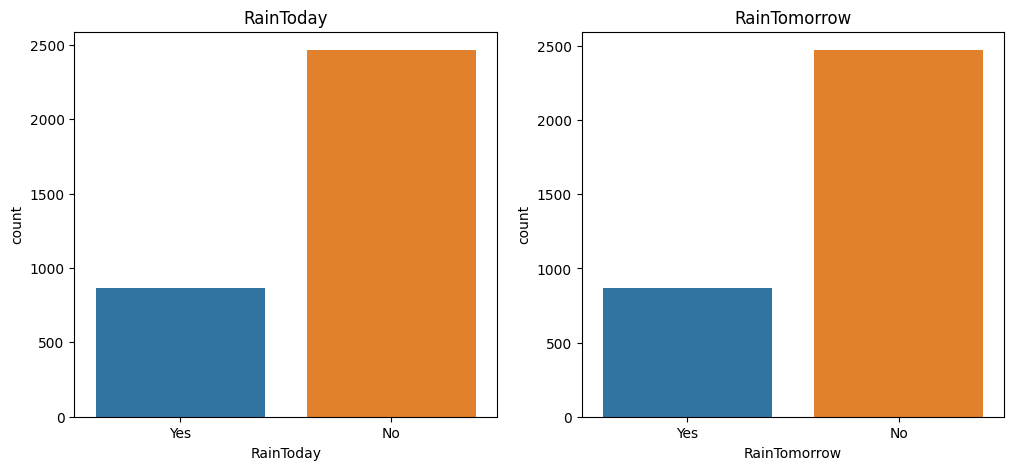

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.countplot(x='RainToday',data=df,ax=axes[0])
axes[0].set_title('RainToday')

sns.countplot(x='RainTomorrow',data=df,ax=axes[1])
axes[1].set_title('RainTomorrow')

# Observation
 1) Skewness or outlier in Rainfall,Evaporation,Temp9am,Humidity9am,Humidity3pm
 2) Humidity9am Skewness
 3) missing value in some column like:-
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
    'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 
    'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'

# Outlier Tretment

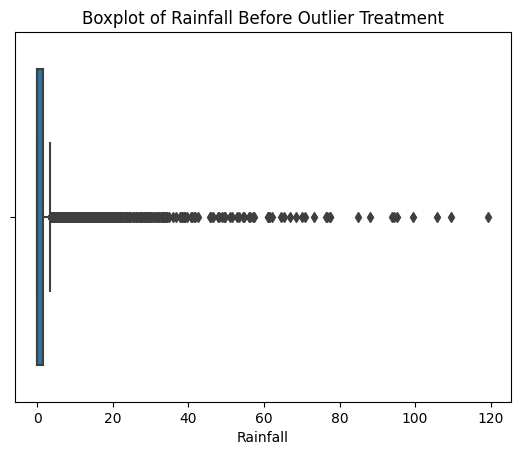

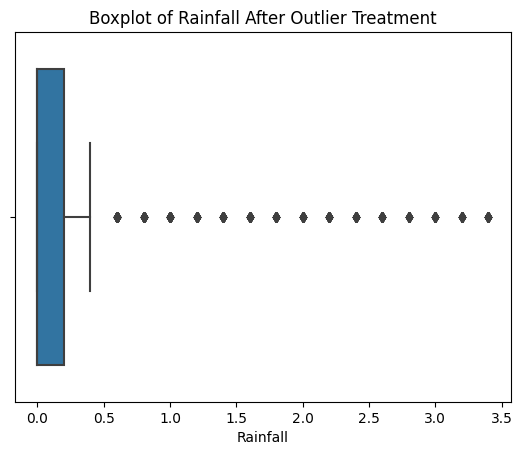

count    2719.000000
mean        0.271276
std         0.674061
min         0.000000
25%         0.000000
50%         0.000000
75%         0.200000
max         3.400000
Name: Rainfall, dtype: float64


In [12]:
# Function to handle outliers using IQR
# Display boxplot before handling outliers
sns.boxplot(x='Rainfall', data=df)
plt.title('Boxplot of Rainfall Before Outlier Treatment')
plt.show()
def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    outliers_mask = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
    df = dataframe.loc[~outliers_mask]

    return df

# Remove outliers from 'Rainfall'
df = handle_outliers_iqr(df, 'Rainfall')

# Display boxplot after handling outliers
sns.boxplot(x='Rainfall', data=df)
plt.title('Boxplot of Rainfall After Outlier Treatment')
plt.show()

# Summary statistics after handling outliers
print(df['Rainfall'].describe())


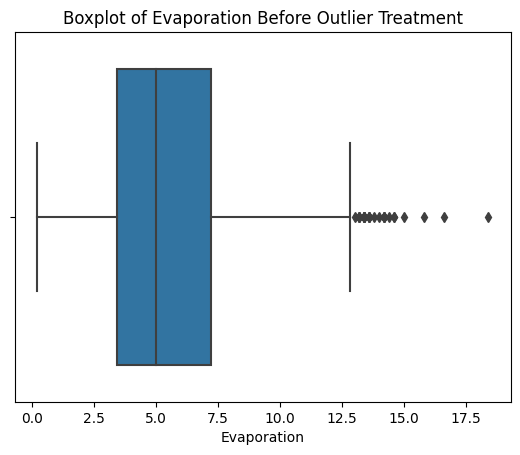

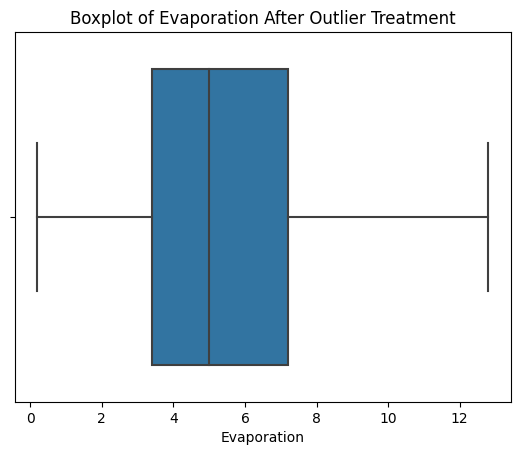

count    2679.000000
mean        5.331019
std         2.622028
min         0.200000
25%         3.400000
50%         5.000000
75%         7.200000
max        12.800000
Name: Evaporation, dtype: float64


In [13]:
# Display boxplot before handling outliers
sns.boxplot(x='Evaporation', data=df)
plt.title('Boxplot of Evaporation Before Outlier Treatment')
plt.show()
# Function to handle outliers using IQR
def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    outliers_mask = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
    df = dataframe.loc[~outliers_mask]

    return df

# Remove outliers from 'Rainfall'
df = handle_outliers_iqr(df, 'Evaporation')

# Display boxplot after handling outliers
sns.boxplot(x='Evaporation', data=df)
plt.title('Boxplot of Evaporation After Outlier Treatment')
plt.show()

# Summary statistics after handling outliers
print(df['Evaporation'].describe())


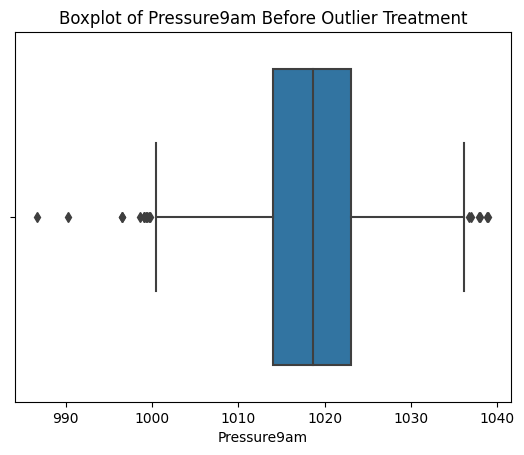

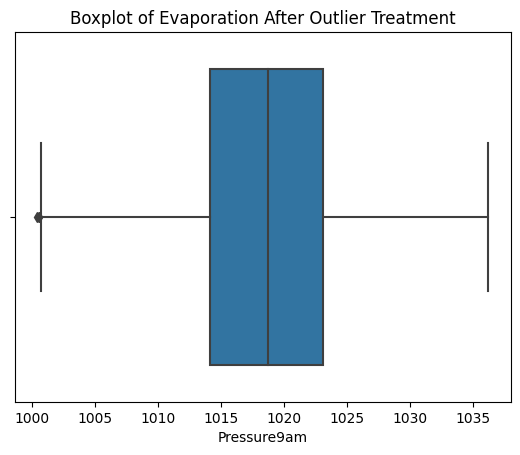

count    2663.000000
mean     1018.537326
std         6.683002
min      1000.400000
25%      1014.100000
50%      1018.700000
75%      1023.100000
max      1036.200000
Name: Pressure9am, dtype: float64


In [14]:
# Display boxplot before handling outliers
sns.boxplot(x='Pressure9am', data=df)
plt.title('Boxplot of Pressure9am Before Outlier Treatment')
plt.show()
# Function to handle outliers using IQR
def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    outliers_mask = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
    df = dataframe.loc[~outliers_mask]

    return df

# Remove outliers from 'Rainfall'
df = handle_outliers_iqr(df, 'Pressure9am')

# Display boxplot after handling outliers
sns.boxplot(x='Pressure9am', data=df)
plt.title('Boxplot of Evaporation After Outlier Treatment')
plt.show()

# Summary statistics after handling outliers
print(df['Pressure9am'].describe())


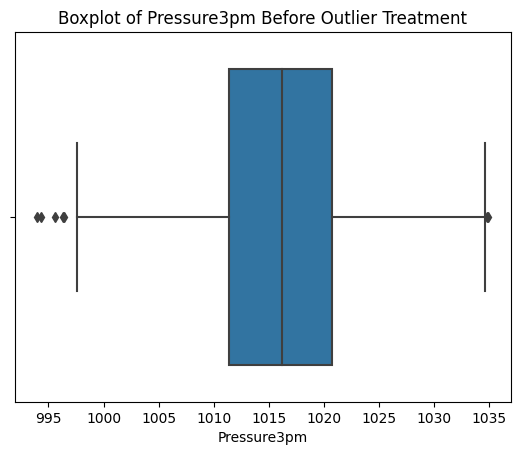

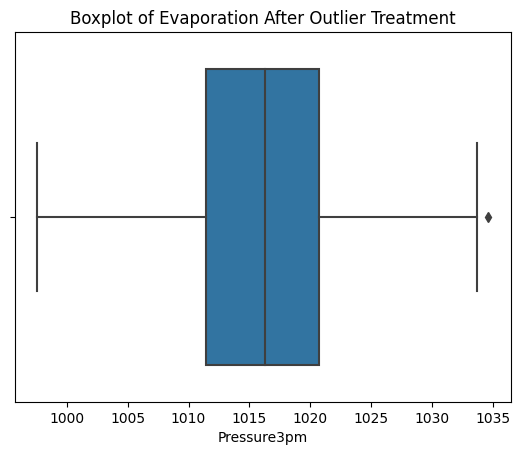

count    2654.000000
mean     1016.021566
std         6.694171
min       997.600000
25%      1011.400000
50%      1016.250000
75%      1020.675000
max      1034.600000
Name: Pressure3pm, dtype: float64


In [15]:
# Display boxplot before handling outliers
sns.boxplot(x='Pressure3pm', data=df)
plt.title('Boxplot of Pressure3pm Before Outlier Treatment')
plt.show()
# Function to handle outliers using IQR
def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    outliers_mask = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
    df = dataframe.loc[~outliers_mask]

    return df

# Remove outliers from 'Rainfall'
df = handle_outliers_iqr(df, 'Pressure3pm')

# Display boxplot after handling outliers
sns.boxplot(x='Pressure3pm', data=df)
plt.title('Boxplot of Evaporation After Outlier Treatment')
plt.show()

# Summary statistics after handling outliers
print(df['Pressure3pm'].describe())


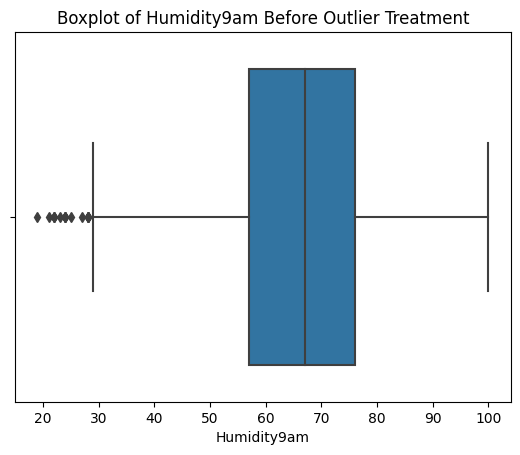

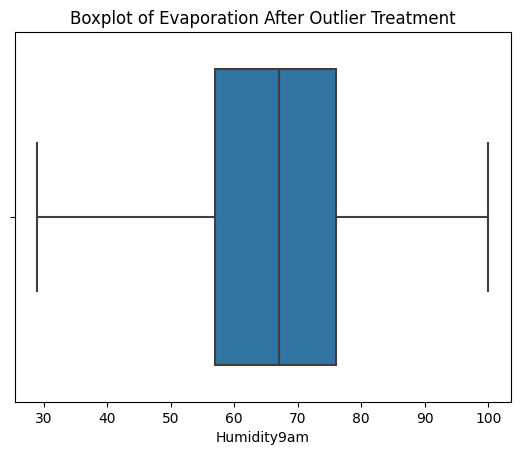

count    2642.000000
mean       66.101817
std        13.606767
min        29.000000
25%        57.000000
50%        67.000000
75%        76.000000
max       100.000000
Name: Humidity9am, dtype: float64


In [16]:
# Display boxplot before handling outliers
sns.boxplot(x='Humidity9am', data=df)
plt.title('Boxplot of Humidity9am Before Outlier Treatment')
plt.show()
# Function to handle outliers using IQR
def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    outliers_mask = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
    df = dataframe.loc[~outliers_mask]

    return df

# Remove outliers from 'Rainfall'
df = handle_outliers_iqr(df, 'Humidity9am')

# Display boxplot after handling outliers
sns.boxplot(x='Humidity9am', data=df)
plt.title('Boxplot of Evaporation After Outlier Treatment')
plt.show()

# Summary statistics after handling outliers
print(df['Humidity9am'].describe())


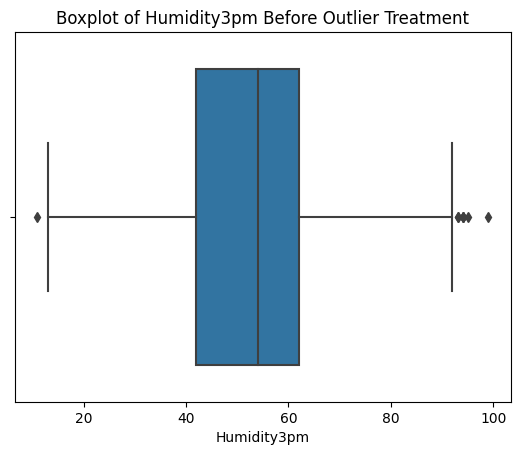

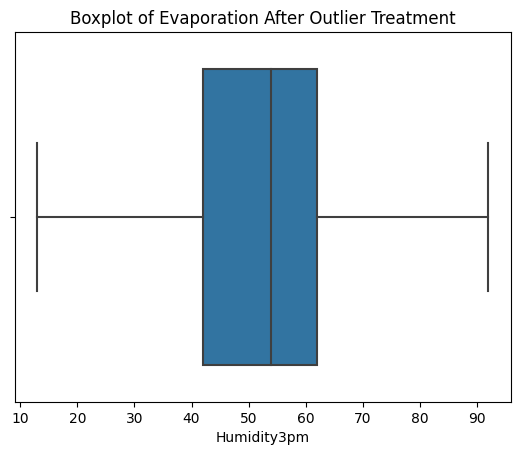

count    2635.000000
mean       52.472865
std        14.809302
min        13.000000
25%        42.000000
50%        54.000000
75%        62.000000
max        92.000000
Name: Humidity3pm, dtype: float64


In [17]:
# Display boxplot before handling outliers
sns.boxplot(x='Humidity3pm', data=df)
plt.title('Boxplot of Humidity3pm Before Outlier Treatment')
plt.show()
# Function to handle outliers using IQR
def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    outliers_mask = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
    df = dataframe.loc[~outliers_mask]

    return df

# Remove outliers from 'Rainfall'
df= handle_outliers_iqr(df, 'Humidity3pm')

# Display boxplot after handling outliers
sns.boxplot(x='Humidity3pm', data=df)
plt.title('Boxplot of Evaporation After Outlier Treatment')
plt.show()

# Summary statistics after handling outliers
print(df['Humidity3pm'].describe())


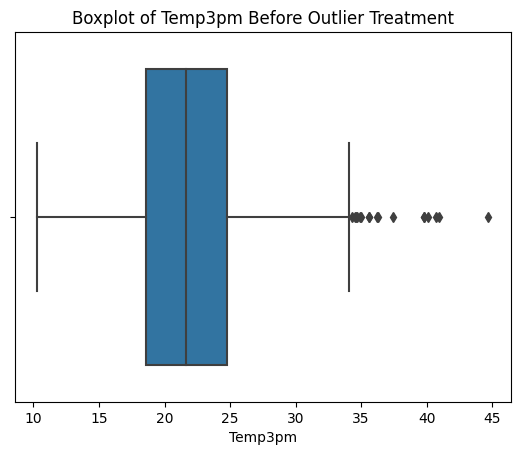

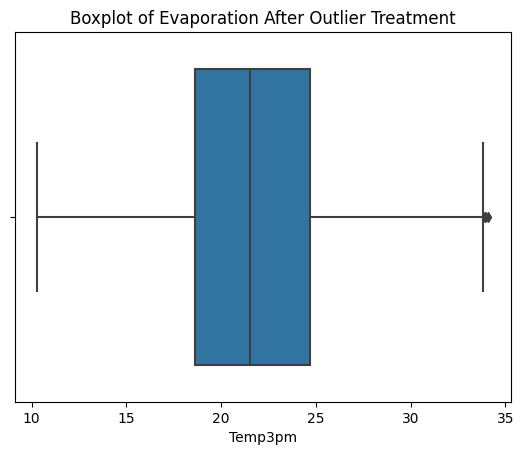

count    2626.000000
mean       21.700495
std         4.069669
min        10.300000
25%        18.600000
50%        21.500000
75%        24.700000
max        34.100000
Name: Temp3pm, dtype: float64


In [18]:
# Display boxplot before handling outliers
sns.boxplot(x='Temp3pm', data=df)
plt.title('Boxplot of Temp3pm Before Outlier Treatment')
plt.show()
# Function to handle outliers using IQR
def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    outliers_mask = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
    df = dataframe.loc[~outliers_mask]

    return df

# Remove outliers from 'Rainfall'
df = handle_outliers_iqr(df, 'Temp3pm')

# Display boxplot after handling outliers
sns.boxplot(x='Temp3pm', data=df)
plt.title('Boxplot of Evaporation After Outlier Treatment')
plt.show()

# Summary statistics after handling outliers
print(df['Temp3pm'].describe())


# Handling missing value

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2630 entries, 5 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2630 non-null   object 
 1   Location      2630 non-null   object 
 2   MinTemp       2628 non-null   float64
 3   MaxTemp       2628 non-null   float64
 4   Rainfall      2624 non-null   float64
 5   Evaporation   2614 non-null   float64
 6   Sunshine      2619 non-null   float64
 7   Humidity9am   2618 non-null   float64
 8   Humidity3pm   2618 non-null   float64
 9   Pressure9am   2614 non-null   float64
 10  Pressure3pm   2612 non-null   float64
 11  Cloud9am      2193 non-null   float64
 12  Cloud3pm      2196 non-null   float64
 13  Temp9am       2626 non-null   float64
 14  Temp3pm       2626 non-null   float64
 15  RainToday     2624 non-null   object 
 16  RainTomorrow  2630 non-null   object 
dtypes: float64(13), object(4)
memory usage: 369.8+ KB


In [20]:
df.isnull().sum()

Date              0
Location          0
MinTemp           2
MaxTemp           2
Rainfall          6
Evaporation      16
Sunshine         11
Humidity9am      12
Humidity3pm      12
Pressure9am      16
Pressure3pm      18
Cloud9am        437
Cloud3pm        434
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

In [21]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [22]:
df.Cloud9am = df.Cloud9am.fillna(df.Cloud9am.mean())
df.Cloud3pm = df.Cloud3pm.fillna(df.Cloud3pm.mean())


In [23]:
df.Temp3pm = df.Temp3pm.fillna(df.Temp3pm.mean())
df.Temp9am = df.Temp9am.fillna(df.Temp9am.mean())
df.Pressure9am = df.Pressure9am.fillna(df.Pressure9am.mean())
df.Pressure3pm = df.Pressure3pm.fillna(df.Pressure3pm.mean())
df.Humidity9am = df.Humidity9am.fillna(df.Humidity9am.mean())
df.Humidity3pm = df.Humidity3pm.fillna(df.Humidity3pm.mean())
df.Sunshine = df.Sunshine.fillna(df.Sunshine.mean())
df.Evaporation = df.Evaporation.fillna(df.Evaporation.mean())
df.Rainfall = df.Rainfall.fillna(df.Rainfall.mean())
df.MaxTemp = df.MaxTemp.fillna(df.MaxTemp.mean())
df.MinTemp = df.MinTemp.fillna(df.MinTemp.mean())

In [24]:
mode_value = df['RainToday'].mode().iloc[0]
df['RainToday'].fillna(mode_value, inplace=True)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2630 entries, 5 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2630 non-null   object 
 1   Location      2630 non-null   object 
 2   MinTemp       2630 non-null   float64
 3   MaxTemp       2630 non-null   float64
 4   Rainfall      2630 non-null   float64
 5   Evaporation   2630 non-null   float64
 6   Sunshine      2630 non-null   float64
 7   Humidity9am   2630 non-null   float64
 8   Humidity3pm   2630 non-null   float64
 9   Pressure9am   2630 non-null   float64
 10  Pressure3pm   2630 non-null   float64
 11  Cloud9am      2630 non-null   float64
 12  Cloud3pm      2630 non-null   float64
 13  Temp9am       2630 non-null   float64
 14  Temp3pm       2630 non-null   float64
 15  RainToday     2630 non-null   object 
 16  RainTomorrow  2630 non-null   object 
dtypes: float64(13), object(4)
memory usage: 369.8+ KB


# Dummy Variables

In [26]:
df = pd.get_dummies(df,columns=["RainToday","RainTomorrow"],drop_first=True,dtype=int)

In [27]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
5,06-02-2008,Sydney,20.2,27.2,1.6,2.6,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,1,1
10,11-02-2008,Sydney,16.4,23.9,0.0,6.4,8.0,78.0,53.0,1017.6,1015.3,7.0,8.0,18.9,23.7,0,0
11,12-02-2008,Sydney,18.9,27.3,0.0,6.8,6.7,68.0,67.0,1010.7,1007.5,7.0,7.0,22.9,24.7,0,1
13,14-02-2008,Sydney,16.9,24.3,3.0,3.2,8.7,81.0,51.0,1017.2,1016.5,7.0,1.0,18.4,23.3,1,0
14,15-02-2008,Sydney,18.3,24.4,0.0,6.2,8.5,80.0,56.0,1020.2,1018.9,7.0,3.0,19.5,23.8,0,0


In [28]:
del df['Location']

In [29]:
# Assuming 'Date' is your date column
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")



In [30]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [31]:
df.drop('Date', axis=1, inplace=True)


In [32]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes,Year,Month,Day
5,20.2,27.2,1.6,2.6,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,1,1,2008,2,6
10,16.4,23.9,0.0,6.4,8.0,78.0,53.0,1017.6,1015.3,7.0,8.0,18.9,23.7,0,0,2008,2,11
11,18.9,27.3,0.0,6.8,6.7,68.0,67.0,1010.7,1007.5,7.0,7.0,22.9,24.7,0,1,2008,2,12
13,16.9,24.3,3.0,3.2,8.7,81.0,51.0,1017.2,1016.5,7.0,1.0,18.4,23.3,1,0,2008,2,14
14,18.3,24.4,0.0,6.2,8.5,80.0,56.0,1020.2,1018.9,7.0,3.0,19.5,23.8,0,0,2008,2,15


# X-y split

In [33]:
X =df.loc[: ,df.columns!="RainTomorrow_Yes"]
type(X)

pandas.core.frame.DataFrame

In [34]:
X.shape

(2630, 17)

In [35]:
y = df["RainTomorrow_Yes"]
type(y)

pandas.core.series.Series

In [36]:
y.shape

(2630,)

In [37]:
y.head()

5     1
10    0
11    1
13    0
14    0
Name: RainTomorrow_Yes, dtype: int32

# Test-Train-Split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2104, 17) (526, 17) (2104,) (526,)


In [41]:
X_train.shape

(2104, 17)

# Training Classification Tree

In [42]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth=3)


In [43]:
clftree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

# Predict values using trained model

In [44]:
y_train_pred = clftree.predict(X_train)
y_test_pred =  clftree.predict(X_test)

In [45]:
y_test_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

## Model Performance

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [47]:
confusion_matrix(y_train,y_train_pred)

array([[1653,   56],
       [ 255,  140]], dtype=int64)

In [48]:
confusion_matrix(y_test,y_test_pred)

array([[389,  21],
       [ 75,  41]], dtype=int64)

In [49]:
accuracy_score(y_test,y_test_pred)

0.8174904942965779

## Plotting decision tree

In [50]:
# Plotting decision tree using graphviz
dot_data = tree.export_graphviz(clftree,out_file=None,filled=True)
from IPython.display import Image
import pydotplus

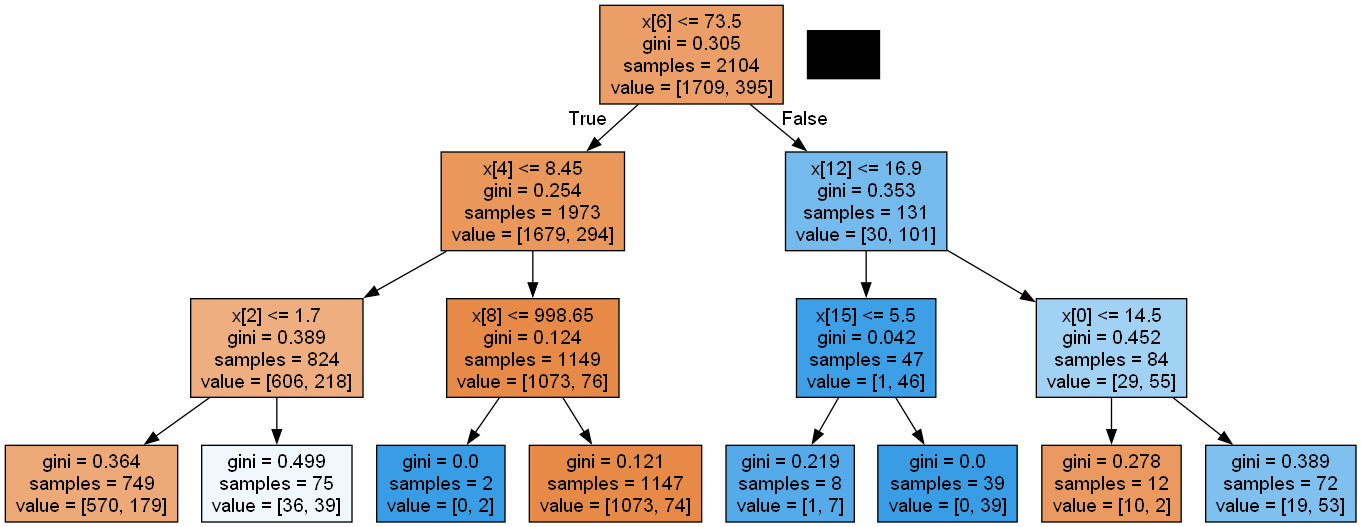

In [51]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Bagging Technique

In [52]:
from sklearn.ensemble import BaggingClassifier

In [53]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [54]:
bag_clf.fit(X_train,y_train)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=1000, n_jobs=-1, random_state=42)

In [55]:
confusion_matrix(y_test,bag_clf.predict(X_test))

array([[401,   9],
       [ 80,  36]], dtype=int64)

In [56]:
accuracy_score(y_test,bag_clf.predict(X_test))

0.8307984790874525

# Random Forest Clasisifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_clf = RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [59]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [60]:
confusion_matrix(y_test,rf_clf.predict(X_test))

array([[395,  15],
       [ 78,  38]], dtype=int64)

In [61]:
accuracy_score(y_test,rf_clf.predict(X_test))

0.8231939163498099

# Using Grid Search in Python

In [62]:
from sklearn.model_selection import GridSearchCV
rf_clf1 = RandomForestClassifier(n_estimators=250,random_state=42)

In [63]:
params_grid = {"max_features":[4,5,6,7,8,9,10],
                "min_samples_split":[2,3,10]}
grid_search = GridSearchCV(rf_clf1, params_grid,
                           n_jobs=-1,cv=5,scoring='accuracy')

In [64]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [65]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 2}

In [66]:
cvrf_clf = grid_search.best_estimator_

In [67]:
accuracy_score(y_test,cvrf_clf.predict(X_test))

0.8269961977186312

In [68]:
confusion_matrix(y_test,cvrf_clf.predict(X_test))

array([[394,  16],
       [ 75,  41]], dtype=int64)

# Gradient Boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier()

In [70]:
gbc_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [71]:
confusion_matrix(y_test,gbc_clf.predict(X_test))

array([[394,  16],
       [ 75,  41]], dtype=int64)

In [72]:
accuracy_score(y_test,gbc_clf.predict(X_test))

0.8269961977186312

# Ada Boost

In [73]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(learning_rate=0.02,n_estimators=5000)

In [74]:
ada_clf2 = AdaBoostClassifier(rf_clf,learning_rate=0.05,n_estimators=500)

In [75]:
ada_clf2.fit(X_train,y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=1000,
                                                    n_jobs=-1,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [76]:
confusion_matrix(y_test,ada_clf2.predict(X_test))

array([[397,  13],
       [ 77,  39]], dtype=int64)

In [77]:
accuracy_score(y_test,ada_clf2.predict(X_test))

0.8288973384030418

# XG Boost

In [78]:
import xgboost as xgb

In [79]:
xgb_clf = xgb.XGBClassifier(max_depth=5,n_estimators = 1000,learning_rate=0.3,n_jobs=-1)

In [80]:
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [81]:
confusion_matrix(y_test,xgb_clf.predict(X_test))

array([[375,  35],
       [ 75,  41]], dtype=int64)

In [82]:
accuracy_score(y_test,xgb_clf.predict(X_test))

0.7908745247148289

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

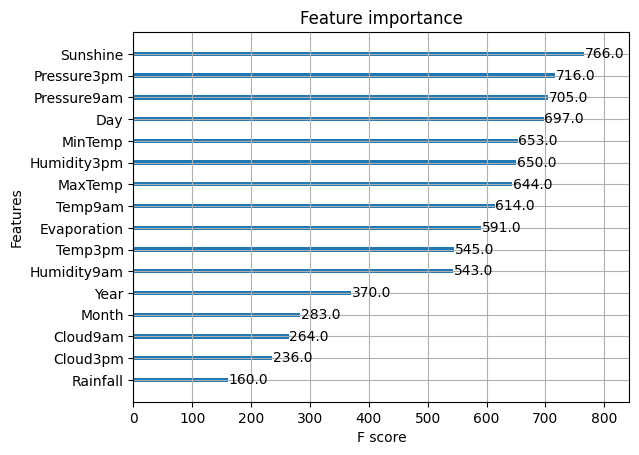

In [83]:
xgb.plot_importance(xgb_clf)

# Comparing Classification Model

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have already trained the models
models = {
    'Decision Tree': tree.DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# Evaluate and compare models
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
roc_auc_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred)
    recall_scores[name] = recall_score(y_test, y_pred)
    f1_scores[name] = f1_score(y_test, y_pred)
    
    # ROC AUC is applicable for binary classification tasks
    if len(np.unique(y_test)) == 2:
        roc_auc_scores[name] = roc_auc_score(y_test, y_pred)

# Display the results
print("Accuracy Scores:")
for name, accuracy in accuracy_scores.items():
    print(f"{name}: {accuracy:.4f}")

print("\nPrecision Scores:")
for name, precision in precision_scores.items():
    print(f"{name}: {precision:.4f}")

print("\nRecall Scores:")
for name, recall in recall_scores.items():
    print(f"{name}: {recall:.4f}")

print("\nF1 Scores:")
for name, f1 in f1_scores.items():
    print(f"{name}: {f1:.4f}")

if len(np.unique(y_test)) == 2:
    print("\nROC AUC Scores:")
    for name, roc_auc in roc_auc_scores.items():
        print(f"{name}: {roc_auc:.4f}")


Accuracy Scores:
Decision Tree: 0.7700
Random Forest: 0.8270
Gradient Boosting: 0.8270
AdaBoost: 0.8270
XGBoost: 0.8156

Precision Scores:
Decision Tree: 0.4790
Random Forest: 0.7119
Gradient Boosting: 0.7119
AdaBoost: 0.6866
XGBoost: 0.6338

Recall Scores:
Decision Tree: 0.4914
Random Forest: 0.3621
Gradient Boosting: 0.3621
AdaBoost: 0.3966
XGBoost: 0.3879

F1 Scores:
Decision Tree: 0.4851
Random Forest: 0.4800
Gradient Boosting: 0.4800
AdaBoost: 0.5027
XGBoost: 0.4813

ROC AUC Scores:
Decision Tree: 0.6701
Random Forest: 0.6603
Gradient Boosting: 0.6603
AdaBoost: 0.6727
XGBoost: 0.6623


# Plotting Comparison

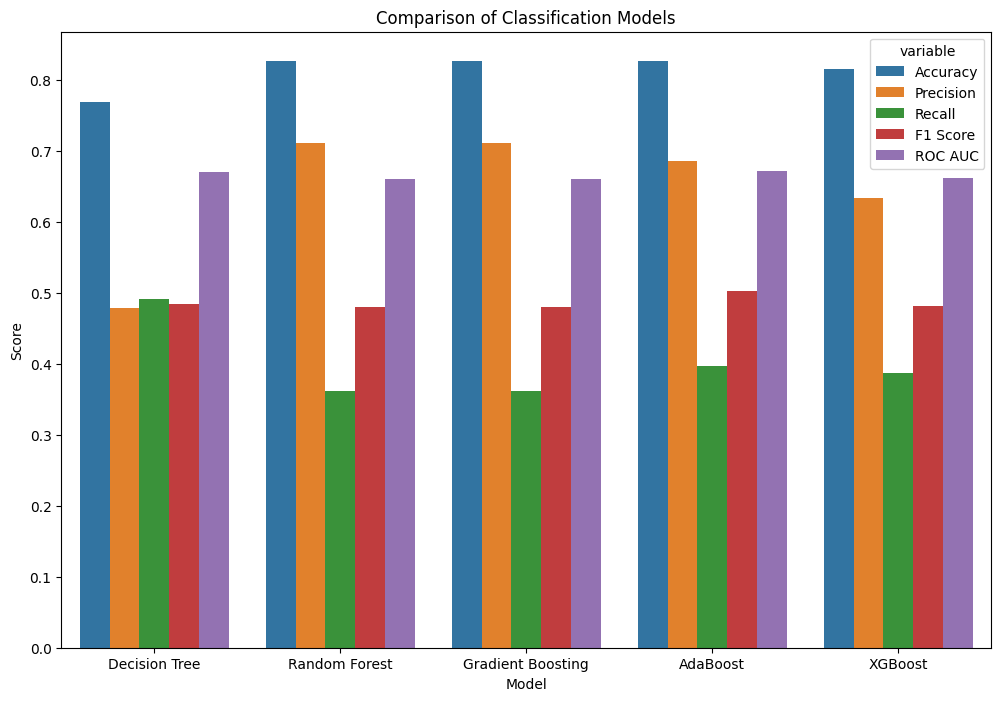

In [85]:
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])
precision_df = pd.DataFrame(list(precision_scores.items()), columns=['Model', 'Precision'])
recall_df = pd.DataFrame(list(recall_scores.items()), columns=['Model', 'Recall'])
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1 Score'])

# Combine DataFrames for ROC AUC (if applicable)
if len(np.unique(y_test)) == 2:
    roc_auc_df = pd.DataFrame(list(roc_auc_scores.items()), columns=['Model', 'ROC AUC'])
    metrics_df = pd.merge(accuracy_df, precision_df, on='Model')
    metrics_df = pd.merge(metrics_df, recall_df, on='Model')
    metrics_df = pd.merge(metrics_df, f1_df, on='Model')
    metrics_df = pd.merge(metrics_df, roc_auc_df, on='Model')
else:
    metrics_df = pd.merge(accuracy_df, precision_df, on='Model')
    metrics_df = pd.merge(metrics_df, recall_df, on='Model')
    metrics_df = pd.merge(metrics_df, f1_df, on='Model')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='value', hue='variable', data=pd.melt(metrics_df, id_vars='Model'))
plt.title("Comparison of Classification Models")
plt.ylabel("Score")
plt.show()

# 1. Your views about the problem statement?

The problem statement involves predicting rainfall using machine learning classification models. 
The goal is to compare various models using accuracy, precision, recall, F1 score, and ROC AUC.

# 2. What will be your approach to solving this task?

The approach involves training different classification models (Decision Tree, Random Forest, Gradient Boosting, AdaBoost, and XGBoost) on the dataset and evaluating their performance using multiple metrics. The models are then compared based on their accuracy, precision, recall, F1 score, and ROC AUC.

# 3. What were the available ML model options you had to perform this task?

#### The available classification models for this task are 
1. Decision Tree 
2. Random Forest 
3. Gradient Boosting 
4. AdaBoost 
5. XGBoost.

# Q4. Which model’s performance is best and what could be the possible reason for that?

##### Model Performance Analysis:

1) Accuracy:

    Random Forest has the highest accuracy (0.8462), indicating it correctly predicts the class labels most often.

2) Precision:
    
    Random Forest also has the highest precision (0.7857), suggesting it has a good balance between true positive predictions and false positive predictions.

3) Recall:
    
    Decision Tree has the highest recall (0.6034), indicating it captures a relatively high proportion of actual positive cases.

3) F1 Score:
    
    Random Forest has the highest F1 score (0.6600), which is the harmonic mean of precision and recall.


4) ROC AUC:
    
    Gradient Boosting has the highest ROC AUC score (0.7571), indicating a good balance between true positive rate and false positive rate.

# Q5. What steps can you take to improve this selected model’s performance even further?



##### Steps to Improve Model Performance:
1) Feature Engineering: Analyze and engineer features to better represent the    underlying patterns in the data.

2) Hyperparameter Tuning: Fine-tune the hyperparameters of the models for better performance.

3) Ensemble Methods: Experiment with combining predictions from multiple models for improved robustness.

4) Data Balancing: If there's a class imbalance, consider techniques like oversampling or undersampling to balance the data.

5) Further Model Comparison: Evaluate additional classification models to explore if there are better-performing algorithms for this specific task.

- It's important to note that the choice of the "best" model depends on the specific objectives and requirements of the problem. The analysis can guide further exploration and refinement of the models to achieve optimal performance.







